# Reluctant Walk Random Sampling Demo
Companion code to the paper:

> Lumbroso, Jeremie, Marni Mishna, and Yann Ponty (2017).
> "[Taming Reluctant Random Walks in the Positive Quadrant.](https://www.sciencedirect.com/science/article/pii/S1571065317300793)"
> *Electronic Notes in Discrete Mathematics* (59), pp. 99-114.

## Imports

We first setup the plotting library for inline display in this Jupyter notebook, and load it.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

We now important relevant objects from the `reluctant_walks` package:

In [3]:
# Fix path to have the root of the 'reluctant_walks' package
import sys
sys.path.append("..")

In [4]:
import reluctant_walks

In [5]:
from reluctant_walks import Step, StepSet
from reluctant_walks.compilers.genrgens import GenRGenSWalkCompiler
from reluctant_walks.compilers.combstruct import CombstructWalkCompiler
from reluctant_walks.graphics import plot_walk
from reluctant_walks.reference import is_quarter_plane, get_nontrivial_qw_model, POSSIBLE_NT_SLOPES

Plotting method for the walks.

In [6]:
from matplotlib.lines import Line2D

def plot_walk(walk, color='red', alpha=0.04):
    Xcur = 0
    Ycur = 0
    Xvec = []
    Yvec = []
    for i in range(len(walk)):
        step = walk[i]
        Xnex = Xcur + step.x
        Ynex = Ycur + step.y
        Xvec.append(Xcur)
        Yvec.append(Ycur)
        Xcur = Xnex
        Ycur = Ynex
    Xvec.reverse()
    Yvec.reverse()
    #line = Line2D(Xvec,Yvec)
    return plt.plot(Xvec, Yvec, color=color, alpha=alpha)

## Setting up

One of our submodules, `reluctant_walks.reference`, provides several convenient methods. The method `get_nontrivial_qw_model` allows you to query a small local database of 79 non-trivial quarterplane small step walk models.

Here we show how to look for all such models that have negative drift and a *best slope*, as per our paper's definition, that is non-zero. We then (arbitrarily) take the second walk that is returned, and display its properties.

In [7]:
by_best_slope = list(POSSIBLE_NT_SLOPES)
if 0 in by_best_slope:
    del by_best_slope[by_best_slope.index(0)]
models = get_nontrivial_qw_model(by_drift=[-1], by_best_slope=by_best_slope)
model = models[2]
model

{'best_slope': (3, 1),
 'coord': (4, 10),
 'drift': -1,
 'id': 17,
 'size': 4,
 'steps': [(0, 1), (1, -1), (-1, -1), (-1, 1)],
 'stepset': StepSet
     Z61: ( 0, +1) weight: 1
     Z62: (+1, -1) weight: -1
     Z63: (-1, -1) weight: -1
     Z64: (-1, +1) weight: 1
 }

## Generation with no slope

The random generators all generate walks that are constrained in one dimension, which are models of half-plane walks. For this reason, it is generally necessary to filter the output of such generators, to check that the outputted walk is in fact in the quarterplane (in production setting, a rejected walk would stop being generated as soon as it exits the quarterplane---here, they may be fully generated which is, strictly speaking, a loss of efficiency).

Here, we first demonstrate what happens when we simply use the original quarter-plane walk model as a half-plane walk model, with no transformation (or no *slope*).

In [8]:
model_without_slope = StepSet(model['steps'])
model_without_slope.slope = 0
genrgens_without_slope = GenRGenSWalkCompiler(model_without_slope)

In [9]:
unrestricted_walks = genrgens_without_slope.generate(1000, 100)
restricted_walks = filter(is_quarter_plane, unrestricted_walks)
print("{} out of {} generated walks were in quarterplane".format(
    len(restricted_walks), len(unrestricted_walks)))

0 out of 1000 generated walks were in quarterplane


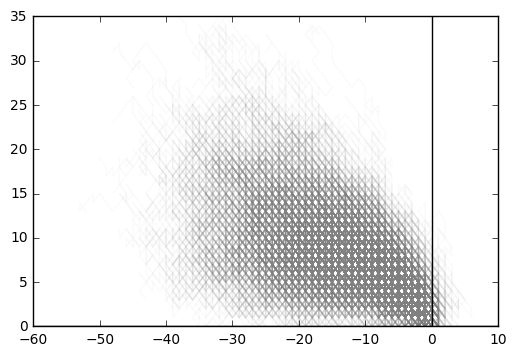

In [10]:
for walk in unrestricted_walks:
    plot_walk(walk, color='grey', alpha=0.04)
for walk in restricted_walks:
    plot_walk(walk, color='green', alpha=0.8)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()

## Generation with slope

We now use (a rational approximation of) the best slope for this walk. The "compiler" will project this quarter-plane walk model to a rotated half-plane model in which it has the lowest probability of exiting the quarter-plane.

In [11]:
model_with_slope = StepSet(model['steps'])
model_with_slope.slope = model['best_slope']
genrgens_with_slope = GenRGenSWalkCompiler(model_with_slope)

In [12]:
unrestricted_walks = genrgens_with_slope.generate(1000, 100)
restricted_walks = filter(is_quarter_plane, unrestricted_walks)
print("{} out of {} generated walks were in quarterplane".format(
    len(restricted_walks), len(unrestricted_walks)))

6 out of 1000 generated walks were in quarterplane


The most important difference is that we are actually able to generate walks

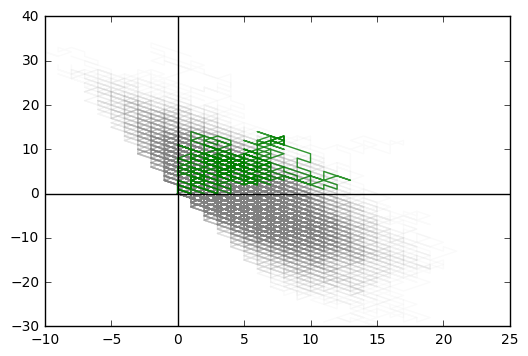

In [13]:
for walk in unrestricted_walks:
    plot_walk(walk, color='grey', alpha=0.04)
for walk in restricted_walks:
    plot_walk(walk, color='green', alpha=0.8)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()